In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('wined.csv')
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
x = wine[['Acl','Alcohol','Malic.acid','Ash']]

In [6]:
y = wine[['Wine']]

In [49]:
wine['Acl']=le.fit_transform(wine['Acl'])
wine['Alcohol']=le.fit_transform(wine['Alcohol'])
wine['Malic.acid']=le.fit_transform(wine['Malic.acid'])
wine['Ash']=le.fit_transform(wine['Ash'])
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,118,43,44,12,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,65,49,18,1,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,63,71,63,32,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,121,59,49,21,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,67,81,75,45,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn import tree

In [8]:
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(x,y)

DecisionTreeClassifier()

In [10]:
model.predict([[1,65,49,17]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

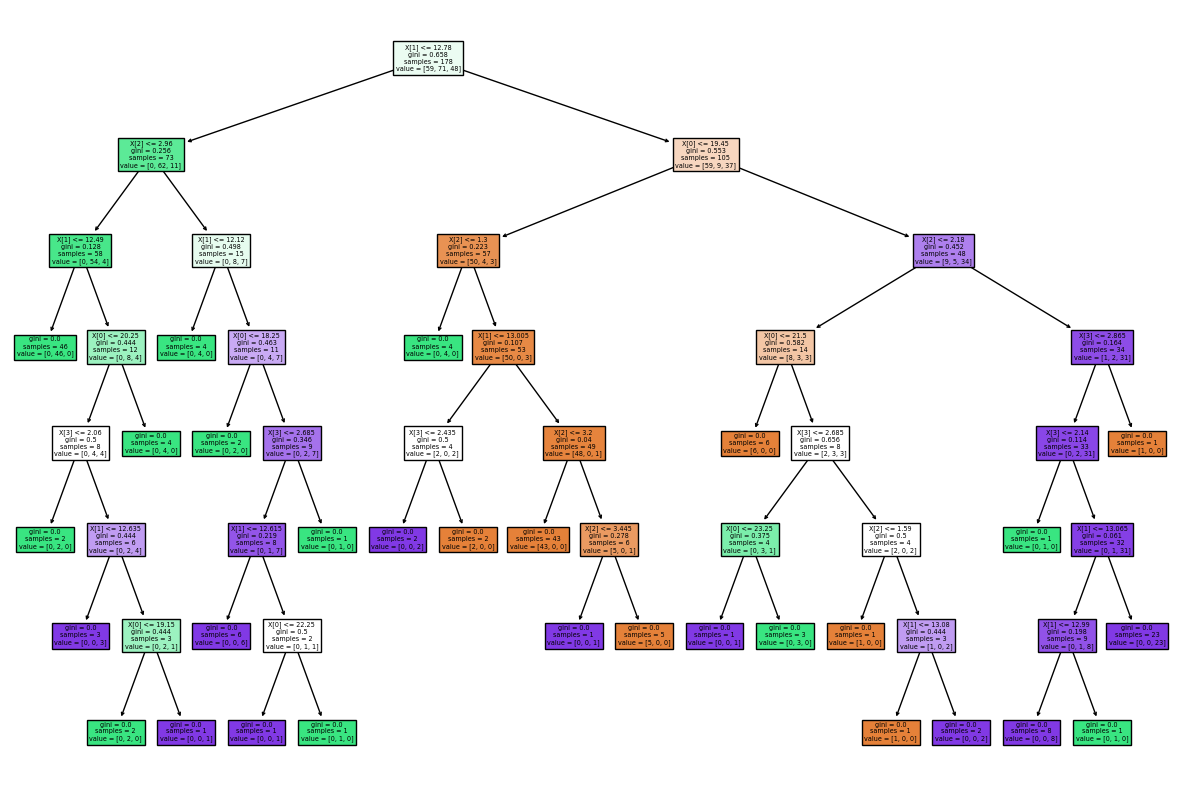

In [11]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [66]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_predicted = model.predict(x_test)

In [68]:
y_predicted

array([3, 3, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 1, 1, 3, 2, 3, 3, 2, 1, 2, 1, 3,
       2, 3, 2, 2, 2, 1, 3, 2, 2, 1])

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
sc = accuracy_score(y_predicted,y_test)*100

In [71]:
sc

79.62962962962963

In [72]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(y_predicted,y_test)*100

31.48148148148148